# Business Intelligence Project
## Piotr Łuczak
## 221481

The first step is loading the necessary libraries:
- pandas for convenient viewing and manipulation of the data set
- sqlalchemy for interfacing with SQL database

In [1]:
import pandas as pd
from sqlalchemy import create_engine
import sklearn as sk
import sklearn.feature_selection as skfs
import sklearn.tree as skt
import sklearn.linear_model as skl
import sklearn.neighbors as skn
import sklearn.svm as sks
import sklearn.neural_network as sknn
import graphviz as gv
import seaborn as sns
from matplotlib.pyplot import figure

In [2]:
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_columns', None)
pd.set_option('max_colwidth', -1)

`create_engine` is used to connect woth the local sqlite DB

In [3]:
DB_file = create_engine('sqlite:///BI_DB.db')

The databse contains a number of datasets that could be analyzed:
- exoplanets  
    Cumultaive dataset containing the objects of interst for the recently retired (15-11-2018) Kepler space observatory. These objects are potential exoplanets discoverd through continuous observation of a set of stars so as to detect the periodic dimming caused by the planets passing between the star and the telescope.   
    Source: https://exoplanetarchive.ipac.caltech.edu/cgi-bin/TblView/nph-tblView?app=ExoTbls&config=cumulative
- meteorites  
    Geographical dataset containing the impact locations and physical properties of meteorite impacts from 2500 BCE to 2012.  
    Source: http://publichealthintelligence.org/content/registered-meteorites-has-impacted-earth-visualized
- satellites  
    A detailed list of satellites currently orbiting Earth.  
    Source: https://www.ucsusa.org/nuclear-weapons/space-weapons/satellite-database

In [4]:
DB_file.table_names()

['exoplanets', 'meteorites', 'satellites']

The following columns are available in the `exoplanets` dataset:

In [5]:
pd.read_sql_query('SELECT * FROM exoplanets LIMIT 1', DB_file)

,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_vet_stat,koi_vet_date,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_disp_prov,koi_comment,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_time0,koi_time0_err1,koi_time0_err2,koi_eccen,koi_eccen_err1,koi_eccen_err2,koi_longp,koi_longp_err1,koi_longp_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,koi_duration_err1,koi_duration_err2,koi_ingress,koi_ingress_err1,koi_ingress_err2,koi_depth,koi_depth_err1,koi_depth_err2,koi_ror,koi_ror_err1,koi_ror_err2,koi_srho,koi_srho_err1,koi_srho_err2,koi_fittype,koi_prad,koi_prad_err1,koi_prad_err2,koi_sma,koi_sma_err1,koi_sma_err2,koi_incl,koi_incl_err1,koi_incl_err2,koi_teq,koi_teq_err1,koi_teq_err2,koi_insol,koi_insol_err1,koi_insol_err2,koi_dor,koi_dor_err1,koi_dor_err2,koi_limbdark_mod,koi_ldm_coeff4,koi_ldm_coeff3,koi_ldm_coeff2,koi_ldm_coeff1,koi_parm_prov,koi_max_sngle_ev,koi_max_mult_ev,koi_model_snr,koi_count,koi_num_transits,koi_tce_plnt_num,koi_tce_delivname,koi_quarters,koi_bin_oedp_sig,koi_trans_mod,koi_model_dof,koi_model_chisq,koi_datalink_dvr,koi_datalink_dvs,koi_steff,koi_steff_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_smet,koi_smet_err1,koi_smet_err2,koi_srad,koi_srad_err1,koi_srad_err2,koi_smass,koi_smass_err1,koi_smass_err2,koi_sage,koi_sage_err1,koi_sage_err2,koi_sparprov,ra,dec,koi_kepmag,koi_gmag,koi_rmag,koi_imag,koi_zmag,koi_jmag,koi_hmag,koi_kmag,koi_fwm_stat_sig,koi_fwm_sra,koi_fwm_sra_err,koi_fwm_sdec,koi_fwm_sdec_err,koi_fwm_srao,koi_fwm_srao_err,koi_fwm_sdeco,koi_fwm_sdeco_err,koi_fwm_prao,koi_fwm_prao_err,koi_fwm_pdeco,koi_fwm_pdeco_err,koi_dicco_mra,koi_dicco_mra_err,koi_dicco_mdec,koi_dicco_mdec_err,koi_dicco_msky,koi_dicco_msky_err,koi_dikco_mra,koi_dikco_mra_err,koi_dikco_mdec,koi_dikco_mdec_err,koi_dikco_msky,koi_dikco_msky_err
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,Active,2018-08-16,CANDIDATE,1.0000,0,0,0,0,q1_q17_dr25_sup_koi,NO_COMMENT,9.488035570,2.7750000e-05,-2.7750000e-05,170.5387500,2.160000e-03,-2.160000e-03,2455003.539,2.160000e-03,-2.160000e-03,0,,,,,,0.1460,0.3180,-0.1460,2.95750,0.08190,-0.08190,,,,6.1580e+02,1.950e+01,-1.950e+01,0.022344,8.320000e-04,-5.280000e-04,3.20796,0.33173,-1.09986,LS+MCMC,2.26,2.600e-01,-1.500e-01,0.0853,,,89.66,,,793.0,,,93.59,29.45,-16.65,24.810000,2.600000,-2.600000,Claret (2011 A&A 529 75) ATLAS LS,0.0000,0.0000,0.2291,0.4603,q1_q17_dr25_koi,5.1358490,28.4708200,35.80,2,142,1,q1_q17_dr25_tce,11111111111111111000000000000000,0.68640,Mandel and Agol (2002 ApJ 580 171),,,010/010797/010797460/dv/kplr010797460-20160209194854_dvr.pdf,010/010797/010797460/dv/kplr010797460-001-20160209194854_dvs.pdf,5455.00,81.00,-81.00,4.467,0.064,-0.096,0.1400,0.1500,-0.1500,0.9270,0.1050,-0.0610,0.9190,0.0520,-0.0460,,,,q1_q17_dr25_stellar,291.934230,48.141651,15.347,15.890,15.270,15.114,15.006,14.082,13.751,13.648,0.002,19.462294000,0.000014000,48.14191000,0.00013000,0.43000,0.51000,0.94000,0.48000,-2.000000e-04,3.20000e-04,-5.500000e-04,3.10000e-04,-0.0100,0.1300,0.2000,0.1600,0.2000,0.1700,0.0800,0.1300,0.3100,0.1700,0.3200,0.1600


The following columns are available in the `meteorites` dataset:

In [6]:
pd.read_sql_query('SELECT * FROM meteorites LIMIT 1', DB_file)

,﻿Meteor mass classes,Coordinate 1,Coordinates 2,Database,Fell/found?,"Mass, g",Place,Type of meteorite,Year
0,0-9kg,22.016667,26.083333,http://www.lpi.usra.edu/meteor/metbull.php?code=52884,Age,0,Kamil,Impact Crater,


The following columns are available in the `satellites` dataset:

In [7]:
pd.read_sql_query('SELECT * FROM satellites LIMIT 1', DB_file)

,Current Official Name of Satellite,Country/Org of UN Registry,Country of Operator/Owner,Operator/Owner,Users,Purpose,Detailed Purpose,Class of Orbit,Type of Orbit,Longitude of GEO (degrees),Perigee (km),Apogee (km),Eccentricity,Inclination (degrees),Period (minutes),Launch Mass (kg.),Dry Mass (kg.),Power (watts),Date of Launch,Expected Lifetime (yrs.),Contractor,Country of Contractor,Launch Site,Launch Vehicle,COSPAR Number,NORAD Number,Comments,Source Used for Orbital Data,
0,Aalto-1,Finland,Finland,University of Aalto,Civil,Technology Development,,LEO,,0,497,517,0.00145,97.45,94.7,5,,4.5,23/06/2017,2,University of Aalto,Finland,Satish Dhawan Space Centre,PSLV,2017-036L,42775,Technology development and education.,JMSatcat/10_17,


## Kepler

Planets are assigned two typs of categories `koi_pdisposition` and `koi_disposition` where the first value is the initial classification based solely on data collected by Kepler, whereas the second value is the actual classification as specified by the Exoplanet Archive.

In [8]:
pd.read_sql_query('SELECT koi_pdisposition, count(rowid) FROM exoplanets GROUP BY koi_pdisposition', DB_file)

,koi_pdisposition,count(rowid)
0,CANDIDATE,4717
1,FALSE POSITIVE,4847


In [9]:
pd.read_sql_query('SELECT koi_disposition, count(rowid) FROM exoplanets GROUP BY koi_disposition', DB_file)

,koi_disposition,count(rowid)
0,CANDIDATE,2426
1,CONFIRMED,2297
2,FALSE POSITIVE,4841


### Problem definition

The aim of this analysis is to detect exoplanets based on the data collected by the Kpler space observatory, hence the target value that we want to predict is the actual KOI classification, that is the `koi_disposition` value. For the purposes of the exercise the classification of the kepler objects of interest done by NASA is assumed to be corrrect.

### Column definitions
The definitions can be found at: https://exoplanetarchive.ipac.caltech.edu/docs/API_kepcandidate_columns.html

### Filtering empty and irrelevant data
Some columns contain only one value, hence they provide no usable information as **their Shannon entropy is equal to zero**.  
Some column contain a limited number of unique values (less than 10), these will also be ingnored as in this case they are mostly anciliary.  
Some columns describe the measurement errors for provided values and are going to be ignored for simplicity.  
Additinally, based on the column definitions, some features were deemed irrelevant.

In [10]:
known_useless = ['rowid', 'kepid', 'kepoi_name', 'kepler_name', 'koi_pdisposition', 
                 'koi_score', 'koi_comment', 'koi_time0bk', 'koi_ldm_coeff1', 'koi_ldm_coeff2', 
                 'koi_ldm_coeff3', 'koi_ldm_coeff4', 'koi_quarters', 'koi_datalink_dvr', 'koi_datalink_dvs',]
known_usable = ['koi_disposition', 'koi_count']
usable_cols = []
for column, count in pd.read_sql_query('SELECT * FROM exoplanets', DB_file).nunique().iteritems():
    if column in known_usable  or count > 10 :
        if '_err' not in column and column not in known_useless:
            usable_cols.append(column)

In [11]:
usable_cols

['koi_disposition',
 'koi_period',
 'koi_time0',
 'koi_impact',
 'koi_duration',
 'koi_depth',
 'koi_ror',
 'koi_srho',
 'koi_prad',
 'koi_sma',
 'koi_incl',
 'koi_teq',
 'koi_insol',
 'koi_dor',
 'koi_max_sngle_ev',
 'koi_max_mult_ev',
 'koi_model_snr',
 'koi_count',
 'koi_num_transits',
 'koi_bin_oedp_sig',
 'koi_steff',
 'koi_slogg',
 'koi_smet',
 'koi_srad',
 'koi_smass',
 'ra',
 'dec',
 'koi_kepmag',
 'koi_gmag',
 'koi_rmag',
 'koi_imag',
 'koi_zmag',
 'koi_jmag',
 'koi_hmag',
 'koi_kmag',
 'koi_fwm_stat_sig',
 'koi_fwm_sra',
 'koi_fwm_sdec',
 'koi_fwm_srao',
 'koi_fwm_sdeco',
 'koi_fwm_prao',
 'koi_fwm_pdeco',
 'koi_dicco_mra',
 'koi_dicco_mdec',
 'koi_dicco_msky',
 'koi_dikco_mra',
 'koi_dikco_mdec',
 'koi_dikco_msky']

In [12]:
len(usable_cols)

48

After the initial fitering a total of 48 columns has been obtained, consisiting of 1 target variable and 47 features.

Selecting only the actual measurement data from the database for further analysis:

In [13]:
kepler = pd.read_sql_query(f'SELECT {", ".join(usable_cols)} FROM exoplanets', DB_file)

In [14]:
kepler.head(5)

,koi_disposition,koi_period,koi_time0,koi_impact,koi_duration,koi_depth,koi_ror,koi_srho,koi_prad,koi_sma,koi_incl,koi_teq,koi_insol,koi_dor,koi_max_sngle_ev,koi_max_mult_ev,koi_model_snr,koi_count,koi_num_transits,koi_bin_oedp_sig,koi_steff,koi_slogg,koi_smet,koi_srad,koi_smass,ra,dec,koi_kepmag,koi_gmag,koi_rmag,koi_imag,koi_zmag,koi_jmag,koi_hmag,koi_kmag,koi_fwm_stat_sig,koi_fwm_sra,koi_fwm_sdec,koi_fwm_srao,koi_fwm_sdeco,koi_fwm_prao,koi_fwm_pdeco,koi_dicco_mra,koi_dicco_mdec,koi_dicco_msky,koi_dikco_mra,koi_dikco_mdec,koi_dikco_msky
0,CONFIRMED,9.488035570,2455003.539,0.1460,2.95750,6.1580e+02,0.022344,3.20796,2.26,0.0853,89.66,793.0,93.59,24.810000,5.1358490,28.4708200,35.80,2,142,0.68640,5455.00,4.467,0.1400,0.9270,0.9190,291.934230,48.141651,15.347,15.890,15.270,15.114,15.006,14.082,13.751,13.648,0.002,19.462294000,48.14191000,0.43000,0.94000,-2.000000e-04,-5.500000e-04,-0.0100,0.2000,0.2000,0.0800,0.3100,0.3200
1,CONFIRMED,54.418382700,2454995.514,0.5860,4.50700,8.7480e+02,0.027954,3.02368,2.83,0.2734,89.57,443.0,9.11,77.900000,7.0276690,20.1095070,25.80,2,25,0.00230,5455.00,4.467,0.1400,0.9270,0.9190,291.934230,48.141651,15.347,15.890,15.270,15.114,15.006,14.082,13.751,13.648,0.003,19.462265000,48.14199000,-0.63000,1.23000,6.600000e-04,-1.050000e-03,0.3900,0.0000,0.3900,0.4900,0.1200,0.5000
2,CANDIDATE,19.899139950,2455008.850,0.9690,1.78220,1.0829e+04,0.154046,7.29555,14.60,0.1419,88.96,638.0,39.30,53.500000,37.1597670,187.4491000,76.30,1,56,0.66240,5853.00,4.544,-0.1800,0.8680,0.9610,297.004820,48.134129,15.436,15.943,15.390,15.220,15.166,14.254,13.900,13.826,0.278,19.800320700,48.13412000,-0.02100,-0.03800,7.000000e-04,6.000000e-04,-0.0250,-0.0340,0.0420,0.0020,-0.0270,0.0270
3,FALSE POSITIVE,1.736952453,2455003.308,1.2760,2.40641,8.0792e+03,0.387394,0.22080,33.46,0.0267,67.09,1395.0,891.96,3.278000,39.0665500,541.8951000,505.60,1,621,0.00000,5805.00,4.564,-0.5200,0.7910,0.8360,285.534610,48.285210,15.597,16.100,15.554,15.382,15.266,14.326,13.911,13.809,0.000,19.035637620,48.28521050,-0.11100,0.00200,3.020000e-03,-1.420000e-03,-0.2490,0.1470,0.2890,-0.2570,0.0990,0.2760
4,CONFIRMED,2.525591777,2455004.596,0.7010,1.65450,6.0330e+02,0.024064,1.98635,2.75,0.0374,85.41,1406.0,926.16,8.750000,4.7499450,33.1919000,40.90,1,515,0.30900,6031.00,4.438,0.0700,1.0460,1.0950,288.754880,48.226200,15.509,16.015,15.468,15.292,15.241,14.366,14.064,13.952,0.733,19.250325800,48.22626000,-0.01000,0.23000,8.000000e-05,-7.000000e-05,0.0300,-0.0900,0.1000,0.0700,0.0200,0.0700


As can be seen above, nearly all the features are continuous. The notable exception is the `koi_count` value which dexcribes the number of planetary candidates indetified in the system.

### Type assignment

Before the data can be analyzed it needs to be converted into correct types so as to facilitate calculations. Since `pandas` could have assigned those types automatically, they need to be checked as manual reassigment could prove unnecessary.

In [15]:
kepler.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 48 columns):
koi_disposition     9564 non-null object
koi_period          9564 non-null object
koi_time0           9564 non-null object
koi_impact          9564 non-null object
koi_duration        9564 non-null object
koi_depth           9564 non-null object
koi_ror             9564 non-null object
koi_srho            9564 non-null object
koi_prad            9564 non-null object
koi_sma             9564 non-null object
koi_incl            9564 non-null object
koi_teq             9564 non-null object
koi_insol           9564 non-null object
koi_dor             9564 non-null object
koi_max_sngle_ev    9564 non-null object
koi_max_mult_ev     9564 non-null object
koi_model_snr       9564 non-null object
koi_count           9564 non-null object
koi_num_transits    9564 non-null object
koi_bin_oedp_sig    9564 non-null object
koi_steff           9564 non-null object
koi_slogg           9564 non-nul

The above output indicates that all features have been assigned the generic `object` type which is unsuitable for computational analysis, hence they need to be converted before numerican analysis can be conducted.

Conversion begins by converting all to numeric (only `koi_disposition` will fail this conversion and remain of type `object`):

In [16]:
for col in kepler.columns:
    kepler[col] = pd.to_numeric(kepler[col], errors='ignore')

And finishes by converting the target variable to its proper type:

In [17]:
kepler.koi_disposition = kepler.koi_disposition.astype('category')

In [18]:
kepler.dtypes

koi_disposition     category
koi_period          float64 
koi_time0           float64 
koi_impact          float64 
koi_duration        float64 
koi_depth           float64 
koi_ror             float64 
koi_srho            float64 
koi_prad            float64 
koi_sma             float64 
koi_incl            float64 
koi_teq             float64 
koi_insol           float64 
koi_dor             float64 
koi_max_sngle_ev    float64 
koi_max_mult_ev     float64 
koi_model_snr       float64 
koi_count           int64   
koi_num_transits    float64 
koi_bin_oedp_sig    float64 
koi_steff           float64 
koi_slogg           float64 
koi_smet            float64 
koi_srad            float64 
koi_smass           float64 
ra                  float64 
dec                 float64 
koi_kepmag          float64 
koi_gmag            float64 
koi_rmag            float64 
koi_imag            float64 
koi_zmag            float64 
koi_jmag            float64 
koi_hmag            float64 
koi_kmag      

The summary of the now correctly typed numerical data can be seen below:

In [19]:
kepler.describe()

,koi_period,koi_time0,koi_impact,koi_duration,koi_depth,koi_ror,koi_srho,koi_prad,koi_sma,koi_incl,koi_teq,koi_insol,koi_dor,koi_max_sngle_ev,koi_max_mult_ev,koi_model_snr,koi_count,koi_num_transits,koi_bin_oedp_sig,koi_steff,koi_slogg,koi_smet,koi_srad,koi_smass,ra,dec,koi_kepmag,koi_gmag,koi_rmag,koi_imag,koi_zmag,koi_jmag,koi_hmag,koi_kmag,koi_fwm_stat_sig,koi_fwm_sra,koi_fwm_sdec,koi_fwm_srao,koi_fwm_sdeco,koi_fwm_prao,koi_fwm_pdeco,koi_dicco_mra,koi_dicco_mdec,koi_dicco_msky,koi_dikco_mra,koi_dikco_mdec,koi_dikco_msky
count,9564.000000,9.564000e+03,9201.000000,9564.000000,9.201000e+03,9201.000000,9243.000000,9201.000000,9201.000000,9200.000000,9201.000000,9.243000e+03,9201.000000,8422.000000,8422.000000,9201.000000,9564.000000,8422.000000,8054.000000,9201.000000,9201.000000,9178.000000,9201.000000,9201.000000,9564.000000,9564.000000,9563.000000,9523.000000,9555.000000,9410.000000,8951.000000,9539.000000,9539.000000,9539.00000,8488.000000,9058.000000,9058.000000,9109.000000,9109.000000,8734.000000,8747.000000,8965.000000,8965.000000,8965.000000,8994.000000,8994.000000,8994.000000
mean,75.671358,2.454999e+06,0.735105,5.621606,2.379134e+04,0.283646,9.164414,102.891778,0.223989,82.469147,1085.385828,7.745737e+03,76.736333,176.846052,1025.664672,259.895001,1.406315,385.006768,0.409500,5706.823280,4.310157,-0.124431,1.728712,1.023706,292.060163,43.810433,14.264606,14.830501,14.221565,14.075138,13.991724,12.993311,12.620604,12.54341,0.150994,19.471356,43.829239,-0.316136,-0.165817,-0.000097,-0.000714,-0.012281,-0.045420,1.866561,-0.024244,-0.076749,1.812566
std,1334.744046,6.791896e+01,3.348832,6.471554,8.224268e+04,3.306558,53.807967,3077.639126,0.566359,15.223627,856.351161,1.592047e+05,845.274598,770.902357,4154.121620,795.806615,0.873289,545.756200,0.500793,796.857947,0.432606,0.282111,6.127185,0.349447,4.766657,3.601243,1.385448,1.501885,1.383713,1.292573,1.230351,1.291912,1.267215,1.26818,0.252648,0.319158,3.599553,20.254777,20.534655,0.058224,0.092986,2.406550,2.573558,2.988742,2.382286,2.553758,2.986376
min,0.241843,2.454954e+06,0.000000,0.052000,0.000000e+00,0.001289,0.000040,0.080000,0.005900,2.290000,25.000000,0.000000e+00,0.373000,2.417437,7.105086,0.000000,1.000000,0.000000,-1.000000,2661.000000,0.047000,-2.500000,0.109000,0.000000,279.852720,36.577381,6.966000,7.225000,7.101000,7.627000,6.702000,4.097000,3.014000,2.31100,0.000000,18.657036,36.576888,-742.430000,-417.900000,-4.000000,-6.000000,-25.100000,-75.900000,0.000000,-27.800000,-76.600000,0.000000
25%,2.733684,2.454966e+06,0.197000,2.437750,1.599000e+02,0.012341,0.229250,1.400000,0.037700,83.920000,539.000000,2.015000e+01,5.358000,3.997856,10.733030,12.000000,1.000000,41.000000,0.134650,5310.000000,4.218000,-0.260000,0.829000,0.845000,288.660770,40.777173,13.440000,13.896500,13.393000,13.294000,13.276000,12.253000,11.914500,11.84300,0.000000,19.243889,40.798688,-0.600000,-0.680000,-0.000210,-0.000220,-0.320000,-0.387000,0.170000,-0.310000,-0.390000,0.210000
50%,9.752831,2.454970e+06,0.537000,3.792600,4.211000e+02,0.021076,0.956720,2.390000,0.085100,88.500000,878.000000,1.416000e+02,15.460000,5.589751,19.254412,23.000000,1.000000,143.000000,0.486600,5767.000000,4.438000,-0.100000,1.000000,0.974000,292.261125,43.677504,14.520000,15.064000,14.471000,14.317500,14.254000,13.236000,12.834000,12.74400,0.006000,19.484983,43.694115,-0.000500,-0.034000,0.000000,0.000000,0.000000,0.000000,0.610000,-0.004000,-0.017000,0.583000
75%,40.715178,2.455004e+06,0.889000,6.276500,1.473400e+03,0.095348,2.897175,14.930000,0.214400,89.770000,1379.000000,8.702900e+02,45.370000,16.947631,71.998003,78.000000,1.000000,469.000000,0.810375,6112.000000,4.543000,0.070000,1.345000,1.101000,295.859160,46.714611,15.322000,15.935500,15.275000,15.063000,14.943000,13.968000,13.551000,13.48450,0.196250,19.726785,46.720630,0.570000,0.500000,0.000240,0.000240,0.309000,0.300000,2.160000,0.290000,0.300000,1.970000
max,129995.778400,2.456306e+06,100.806000,138.540000,1.541400e+06,99.870651,980.854190,2

In order to be used in `sklearn` categories need to be converteted to ints:

In [20]:
kepler_category_names = kepler.koi_disposition.cat.categories

In [21]:
dict(enumerate(kepler.koi_disposition.cat.categories))

{0: 'CANDIDATE', 1: 'CONFIRMED', 2: 'FALSE POSITIVE'}

In [22]:
kepler.koi_disposition = kepler.koi_disposition.cat.codes

### Observing correlations

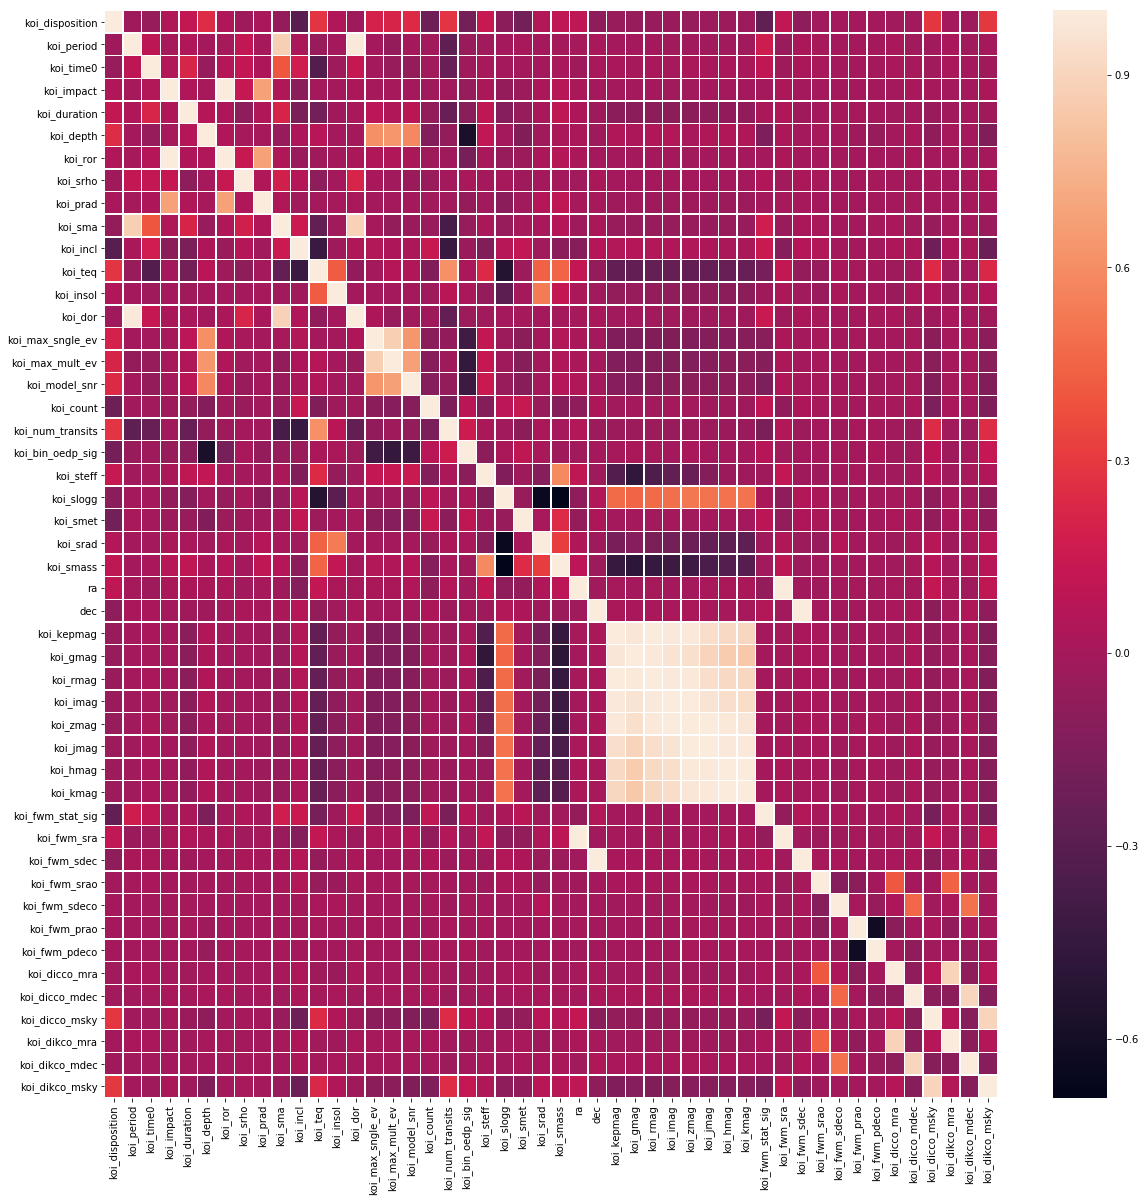

In [23]:
figure(figsize=(20,20))
sns.heatmap(kepler.corr(),linewidths=.5)

As can be seen on the above heatmap some values tend to have strong correlation between themselves, such as the magnitudes `koi_?mag` of the KIC and 2MASS parameters. Due to this strong correltion it should be sufficient to use just one of these features in the final prediction model as adding more is unlikely to provide additonal information.

### Dropping rows with missing values

Since many algotithms require all feature values to be present, `NULL` and `NaN` values need to either be imputed from remaining data (i.e. replaced with the mean value for a partivular column) or removed from the set. Due to the limited knowlegde in the filed of astrophysics, no informed decision could be made regarding the imputation method, hence approximately 1500 rows with missing values were removed from the set.

In [24]:
kepler.isnull().sum()

koi_disposition     0   
koi_period          0   
koi_time0           0   
koi_impact          363 
koi_duration        0   
koi_depth           363 
koi_ror             363 
koi_srho            321 
koi_prad            363 
koi_sma             363 
koi_incl            364 
koi_teq             363 
koi_insol           321 
koi_dor             363 
koi_max_sngle_ev    1142
koi_max_mult_ev     1142
koi_model_snr       363 
koi_count           0   
koi_num_transits    1142
koi_bin_oedp_sig    1510
koi_steff           363 
koi_slogg           363 
koi_smet            386 
koi_srad            363 
koi_smass           363 
ra                  0   
dec                 0   
koi_kepmag          1   
koi_gmag            41  
koi_rmag            9   
koi_imag            154 
koi_zmag            613 
koi_jmag            25  
koi_hmag            25  
koi_kmag            25  
koi_fwm_stat_sig    1076
koi_fwm_sra         506 
koi_fwm_sdec        506 
koi_fwm_srao        455 
koi_fwm_sdeco       455 


In [25]:
kepler = kepler.dropna()

### Train - Test split

In order to prevent the classifiers from simply "memorizing" the correct values the dataset had to be split into testing and training sets. The typical value od 70% of entire set was used as the size of the training set.

In [26]:
kepler_train = kepler.sample(frac=0.7, random_state=42)
kepler_test = kepler.loc[~kepler.index.isin(kepler_train.index), :]

kepler_train_y = kepler_train.pop('koi_disposition').values
kepler_test_y = kepler_test.pop('koi_disposition').values

In [27]:
print(f"""Total set size: {kepler.shape[0]}
Training set size: {kepler_train.shape[0]} or {kepler_train.shape[0]/kepler.shape[0]} %
Testing set size {kepler_test.shape[0]} or {kepler_test.shape[0]/kepler.shape[0]} %""")

Total set size: 6682
Training set size: 4677 or 0.6999401376833283 %
Testing set size 2005 or 0.30005986231667164 %


### Feature selection

Ten best features were selectes (i.e. ~20% of the 47 feature input set) so as to minimize the influence of the noise and speed up the calculations.

In [28]:
kepler_selector = sk.feature_selection.SelectKBest(sk.feature_selection.mutual_info_classif, k=10)
kepler_best = kepler_selector.fit_transform(kepler_train, kepler_train_y)
kepler_best_cols = [kepler_test.columns[i] for i in kepler_selector.get_support(indices=True)]

In [29]:
kepler_best_cols

['koi_ror',
 'koi_prad',
 'koi_fwm_srao',
 'koi_fwm_sdeco',
 'koi_dicco_mra',
 'koi_dicco_mdec',
 'koi_dicco_msky',
 'koi_dikco_mra',
 'koi_dikco_mdec',
 'koi_dikco_msky']

In [30]:
kepler[kepler_best_cols].describe()

,koi_ror,koi_prad,koi_fwm_srao,koi_fwm_sdeco,koi_dicco_mra,koi_dicco_mdec,koi_dicco_msky,koi_dikco_mra,koi_dikco_mdec,koi_dikco_msky
count,6682.000000,6682.000000,6682.000000,6682.000000,6682.000000,6682.000000,6682.000000,6682.000000,6682.000000,6682.000000
mean,0.133194,23.330560,-0.235452,-0.613978,-0.026657,-0.078825,1.682620,-0.024833,-0.090366,1.624028
std,0.688142,333.353119,9.440263,12.805662,2.202001,2.439362,2.823965,2.169180,2.397582,2.797022
min,0.001289,0.080000,-275.600000,-397.620000,-21.500000,-75.900000,0.000000,-23.600000,-76.600000,0.000000
25%,0.012448,1.380000,-0.530000,-0.600000,-0.280000,-0.310000,0.152000,-0.270000,-0.320000,0.199000
50%,0.021419,2.350000,0.000000,-0.037500,0.000000,0.000000,0.510000,-0.002000,-0.016000,0.481000
75%,0.077028,11.580000,0.510000,0.480000,0.260000,0.250000,1.887500,0.250000,0.260000,1.637500
max,24.662711,26042.900000,97.780000,98.780000,45.680000,27.500000,88.600000,46.570000,31.200000,89.600000


### Multi Layer Perceptron

In [31]:
kepler_nn_clf = sk.neural_network.MLPClassifier(max_iter=1000, activation='logistic').fit(kepler_best, kepler_train_y)
kepler_nn_clf_score = kepler_nn_clf.score(kepler_test[kepler_best_cols], kepler_test_y)
print(f"Multi layer perceptron accuracy: {kepler_nn_clf_score}")

Multi layer perceptron accuracy: 0.7446384039900249


### kNN Classifier:

In [32]:
kepler_kNN_clf = sk.neighbors.KNeighborsClassifier().fit(kepler_best, kepler_train_y)
kepler_kNN_clf_score = kepler_kNN_clf.score(kepler_test[kepler_best_cols], kepler_test_y)
print(f"kNN accuracy: {kepler_kNN_clf_score}")

kNN accuracy: 0.7137157107231921


### Logistic regression 

In [33]:
kepler_log_reg_clf = sk.linear_model.LogisticRegression(solver='lbfgs', multi_class='ovr', max_iter=1000).fit(kepler_best, kepler_train_y)
kepler_log_reg_clf_score = kepler_log_reg_clf.score(kepler_test[kepler_best_cols], kepler_test_y)
print(f"Logistic regression accuracy: {kepler_log_reg_clf_score}")

Logistic regression accuracy: 0.7236907730673316


### Linear SVM (Suppor Vector Machines)

In [34]:
kepler_svc_clf = sk.svm.SVC(gamma='scale').fit(kepler_best, kepler_train_y)
kepler_svc_clf_score = kepler_svc_clf.score(kepler_test[kepler_best_cols], kepler_test_y)
print(f"SVM accuracy: {kepler_svc_clf_score}")

SVM accuracy: 0.6922693266832918


### Decision tree:

In [43]:
kepler_tree_clf = sk.tree.DecisionTreeClassifier(criterion='entropy',min_samples_leaf=0.1).fit(kepler_best, kepler_train_y)
kepler_tree_clf_score = kepler_tree_clf.score(kepler_test[kepler_best_cols], kepler_test_y)
print(f"Tree accuracy: {kepler_tree_clf_score}")

Tree accuracy: 0.7386533665835412


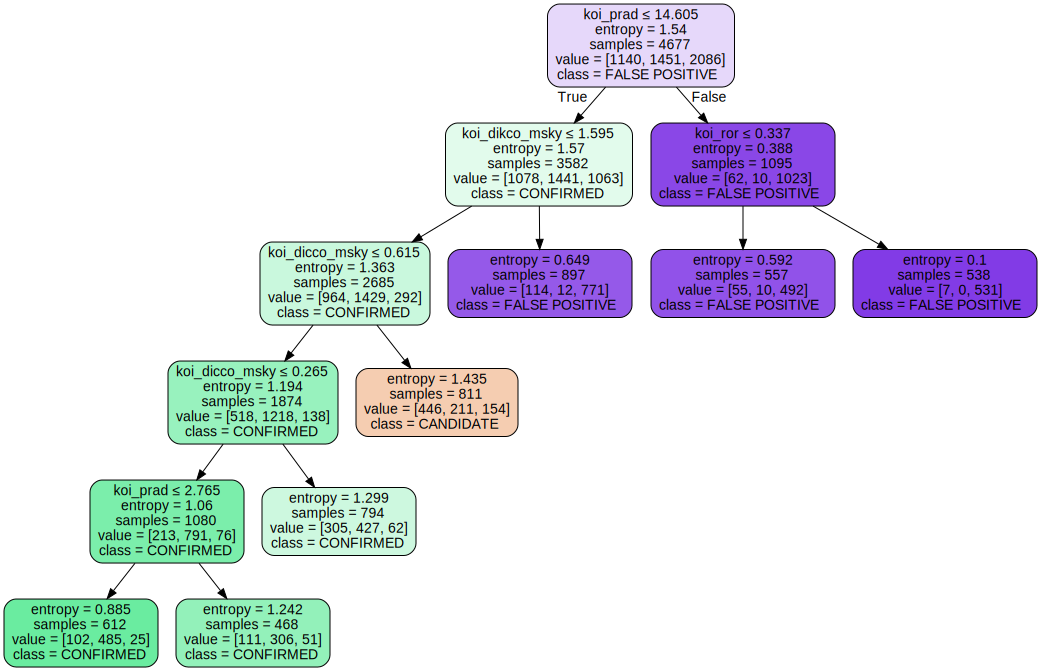

In [44]:
dot_data = sk.tree.export_graphviz(kepler_tree_clf, out_file=None,
                                   feature_names=kepler_best_cols, 
                                   class_names=kepler_category_names, 
                                   filled=True, rounded=True, 
                                   special_characters=True) 
graph = gv.Source(dot_data) 
graph

### Conclusions

In [45]:
pd.DataFrame({
    'Model': ['Multi Layer Perceptron', 'kNN', 'Logistic Regression', 'Support Vector Machines', 'Decision Tree'],
    'Score': [kepler_nn_clf_score, kepler_kNN_clf_score, kepler_log_reg_clf_score, 
              kepler_svc_clf_score, kepler_tree_clf_score]}).sort_values(by='Score', ascending=False)

,Model,Score
0,Multi Layer Perceptron,0.744638
4,Decision Tree,0.738653
2,Logistic Regression,0.723691
1,kNN,0.713716
3,Support Vector Machines,0.692269


As can be seen from the above data, all methods provide aprtoximately 70% percent accuracy, though the Multi Layer Perceptron appears to be the best choice for detecting exoplanets.

While on the decision tree above it appears that the `koi_dicco_msky` (i.e. the angular offset on the plane of the sky between the best-fit PRF centroids from the Out-Of-Transit image and the Difference Image by averaging the weighted single-quarter measurements.) could be the best discriminator between actual planets and false positives, it is important to note that none of the leaves presented on the tree are pure and hence one cannot make such statements with complete certainty.